Name: Shyam Nath
Course Title:Advanced Big Data and Data Mining (MSCS-634-M40)
Lab 6: Association Rule Mining with Apriori and FP-Growth

C:\Users\Stephanie\AppData\Local\Temp\ipykernel_15632\2872295901.py:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


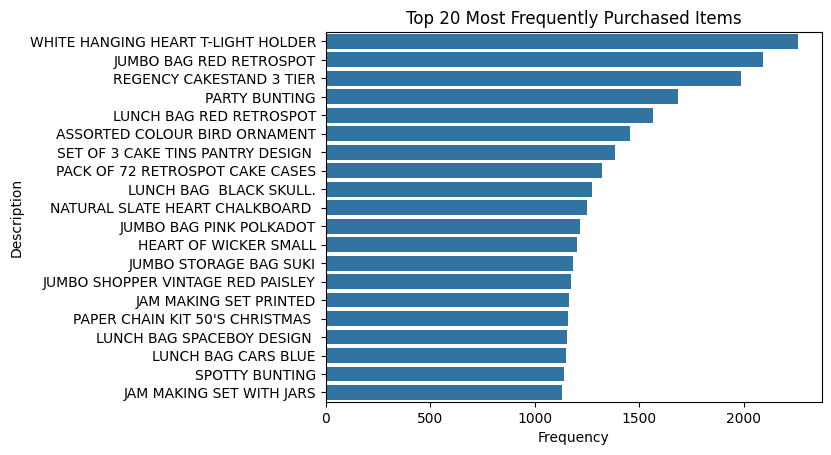

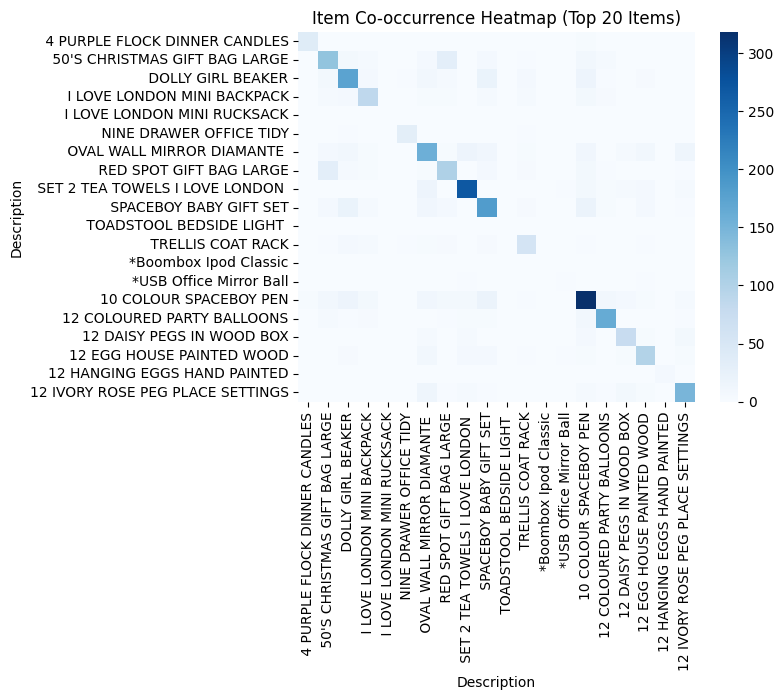

In [1]:
# --- Step 1: Data Preparation ---

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules

# Load dataset
df = pd.read_excel("Online Retail.xlsx")

# Basic cleaning
df.dropna(subset=['InvoiceNo', 'StockCode', 'Description'], inplace=True)
df = df[df['Quantity'] > 0]
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Create basket format (InvoiceNo x Description)
basket = df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# --- Visualizations: Most Frequent Items ---
item_counts = basket.sum().sort_values(ascending=False).head(20)
sns.barplot(x=item_counts.values, y=item_counts.index)
plt.title("Top 20 Most Frequently Purchased Items")
plt.xlabel("Frequency")
plt.show()

# --- Visualizations: Co-occurrence Heatmap ---
co_matrix = np.dot(basket.T, basket)
co_matrix_df = pd.DataFrame(co_matrix, index=basket.columns, columns=basket.columns)
sns.heatmap(co_matrix_df.iloc[:20, :20], cmap='Blues')
plt.title("Item Co-occurrence Heatmap (Top 20 Items)")
plt.show()

c:\Users\Stephanie\AppData\Local\Programs\Python\Python313\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


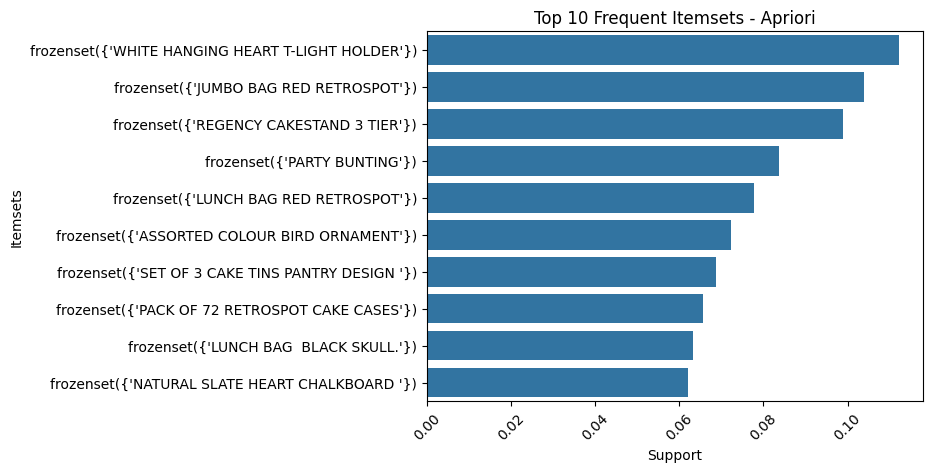

In [2]:
# --- Step 2: Apriori ---
frequent_itemsets_apriori = apriori(basket, min_support=0.02, use_colnames=True)

# Top N frequent itemsets
apriori_top = frequent_itemsets_apriori.sort_values(by='support', ascending=False).head(10)
sns.barplot(x='support', y=apriori_top['itemsets'].astype(str), data=apriori_top)
plt.title("Top 10 Frequent Itemsets - Apriori")
plt.xlabel("Support")
plt.ylabel("Itemsets")
plt.xticks(rotation=45)
plt.show()


c:\Users\Stephanie\AppData\Local\Programs\Python\Python313\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


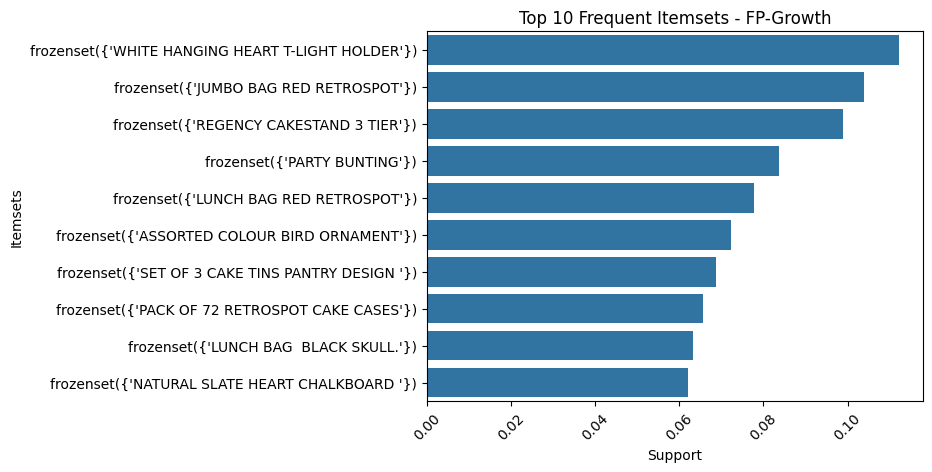

In [3]:
# --- Step 3: FP-Growth ---
frequent_itemsets_fp = fpgrowth(basket, min_support=0.02, use_colnames=True)

# Top N frequent itemsets
fp_top = frequent_itemsets_fp.sort_values(by='support', ascending=False).head(10)
sns.barplot(x='support', y=fp_top['itemsets'].astype(str), data=fp_top)
plt.title("Top 10 Frequent Itemsets - FP-Growth")
plt.xlabel("Support")
plt.ylabel("Itemsets")
plt.xticks(rotation=45)
plt.show()

                     antecedents                        consequents   support  \
0  (60 TEATIME FAIRY CAKE CASES)  (PACK OF 72 RETROSPOT CAKE CASES)  0.022497   
1   (ALARM CLOCK BAKELIKE GREEN)        (ALARM CLOCK BAKELIKE PINK)  0.020759   
2    (ALARM CLOCK BAKELIKE PINK)       (ALARM CLOCK BAKELIKE GREEN)  0.020759   
3   (ALARM CLOCK BAKELIKE GREEN)        (ALARM CLOCK BAKELIKE RED )  0.031784   
4    (ALARM CLOCK BAKELIKE RED )       (ALARM CLOCK BAKELIKE GREEN)  0.031784   

   confidence       lift  
0    0.547101   8.345784  
1    0.426531  10.968864  
2    0.533844  10.968864  
3    0.653061  12.511932  
4    0.608944  12.511932  


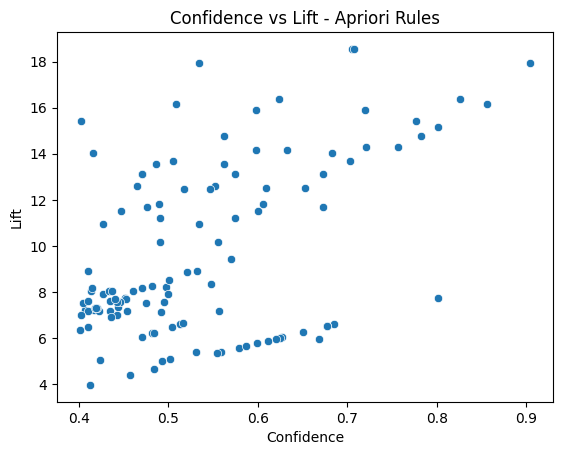

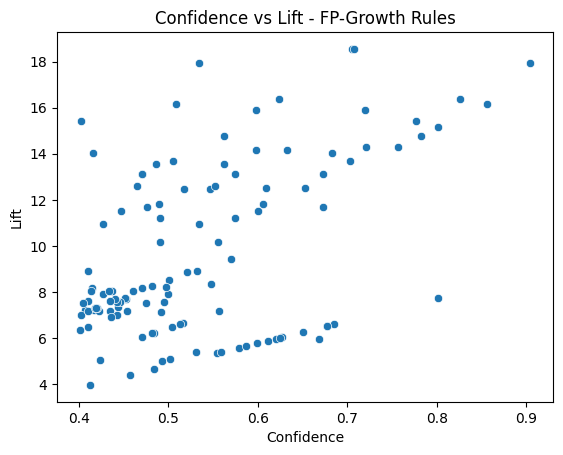

In [4]:
# --- Step 4: Association Rules ---
rules_apriori = association_rules(frequent_itemsets_apriori, metric='confidence', min_threshold=0.4)
rules_fp = association_rules(frequent_itemsets_fp, metric='confidence', min_threshold=0.4)

# View sample rules
print(rules_apriori[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

# Scatter plot - Apriori
sns.scatterplot(x='confidence', y='lift', data=rules_apriori)
plt.title("Confidence vs Lift - Apriori Rules")
plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.show()

# Scatter plot - FP-Growth
sns.scatterplot(x='confidence', y='lift', data=rules_fp)
plt.title("Confidence vs Lift - FP-Growth Rules")
plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.show()


In [5]:
# --- Step 5: Comparative Analysis ---

# Timing Apriori
start_apriori = time.time()
apriori(basket, min_support=0.02, use_colnames=True)
end_apriori = time.time()
print("Apriori Execution Time:", round(end_apriori - start_apriori, 2), "seconds")

# Timing FP-Growth
start_fp = time.time()
fpgrowth(basket, min_support=0.02, use_colnames=True)
end_fp = time.time()
print("FP-Growth Execution Time:", round(end_fp - start_fp, 2), "seconds")


c:\Users\Stephanie\AppData\Local\Programs\Python\Python313\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Apriori Execution Time: 109.4 seconds


c:\Users\Stephanie\AppData\Local\Programs\Python\Python313\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


FP-Growth Execution Time: 19.41 seconds
